In [1]:
from prettytable import PrettyTable
import random
from pprint import pprint

In [2]:
def dec_to_fxp(decimal_num, is_signed, int_bits, frac_bits):
    if is_signed and decimal_num < 0:
        total_bits = int_bits + frac_bits
        decimal_num += (1 << total_bits)
    scaled_num = round(decimal_num * (1 << frac_bits))
    binary_rep = f'{scaled_num:0{int_bits + frac_bits}b}'
    return binary_rep

def fxp_to_dec(binary_str, is_signed, int_bits, frac_bits):
    total_bits = int_bits + frac_bits
    binary_str = binary_str.zfill(total_bits)
    if is_signed and binary_str[0] == '1':
        binary_str = ''.join('1' if b == '0' else '0' for b in binary_str)
        decimal_num = int(binary_str, 2) - (1 << total_bits)
    else:
        decimal_num = int(binary_str, 2)
    return decimal_num / (1 << frac_bits)

In [ ]:
print(fxp_to_dec("01111100000111110000011111000010", False, 1, 31))

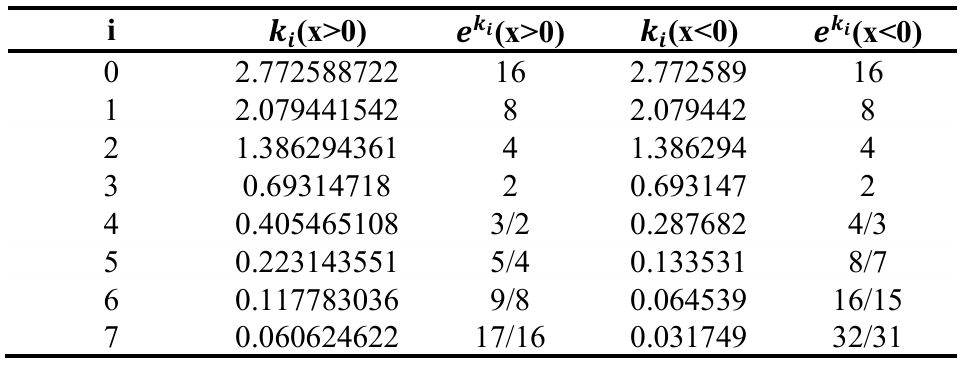

In [4]:
import math

k_LUT = [2.772588722, 2.079441542, 1.386294361, 0.69314718, 0.405465108, 0.223143551, 0.117783036, 0.060624622]
e_LUT = [16, 8, 4, 2, 3/2, 5/4, 9/8, 17/16]

e_LUT.extend([2**i for i in range(19, 4, -1)])
k_LUT = [math.log(e) for e in e_LUT]

sorted_pairs = sorted(zip(e_LUT, k_LUT), key=lambda x: x[1], reverse=True)
e_LUT, k_LUT = zip(*sorted_pairs)

In [5]:
is_signed       = False
total_bits      = 40
integer_bits    = 8
fraction_bits   = total_bits - integer_bits
bin_vals        = []
table = PrettyTable()
table.field_names = [ "Decimal (Input)", f"Fixed-Point Binary (Q{integer_bits}.{fraction_bits})", "Decimal (Output)" ]
for decimal_num in k_LUT:
    fixed_point_bin = dec_to_fxp(decimal_num, is_signed, integer_bits, fraction_bits)
    decimal_output = fxp_to_dec(fixed_point_bin, is_signed, integer_bits, fraction_bits)
    table.add_row([f"{decimal_num:.9f}", fixed_point_bin, f"{decimal_output:.9f}"])
    bin_vals.append(fixed_point_bin)
# print(table)

In [ ]:
i = 0
sum = 0
for k in k_LUT:
    s = "" if i >= 10 else " "
    k_space = "" if k >= 10 else " "
    formatted_k = f"{k:.9f}"
    sum += float(formatted_k)
    print(f"\tassign k_LUT[{i}] {s}= 40'b{bin_vals[i]};  /* {k_space}{formatted_k} */")
    i += 1

print(sum)

In [7]:
def generate_file(file_path, data_list):
  with open(file_path, 'w') as file:
    for item in data_list:
      file.write(f"{item}\n")

In [8]:
num_test    = 8
input_data  = []
golden_data = []

for i in range(num_test):
    input_data.append(random.randint(1, 127))

for value in input_data:
    golden_data.append(dec_to_fxp(math.exp(value), False, 184, 0))

generate_file("D:/VLSI/Capstone/tb/input/exp.txt", input_data)
generate_file("D:/VLSI/Capstone/tb/output/SPMM/exp.txt", golden_data)

In [9]:
a_data = [-15, 40]
b_data = []
b_fxp  = []

for i in range(2):
  b_data.append(random.uniform(0, 1))

for item in b_data:
  b_fxp.append(dec_to_fxp(item, False, 1, 31))

In [ ]:
print(a_data)
print(b_data)
print(b_fxp)

for i in range(2):
  print(a_data[i] * b_data[i])